<a href="https://colab.research.google.com/github/ASHISHVERMA114142/ML_Projects/blob/main/ML3_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
dataset = pd.read_csv("derm.csv")
# dataset=dataset+1;
dataset.head(10)
# print(type(dataset))

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41.0,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18.0,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57.0,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22.0,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30.0,4


In [69]:
print(dataset.shape)

(366, 35)


In [70]:
dataset.isnull().sum()#in our data set we have any missing values so we have to replace missing values with mode age

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [71]:
df=dataset['age'].fillna(dataset['age'].mode()[0])
dataset['age']=df
dataset.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

Text(0, 0.5, 'count')

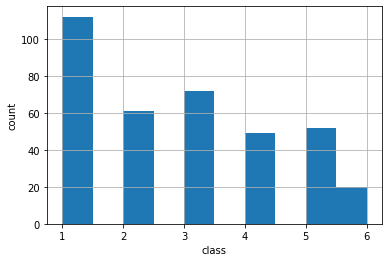

In [72]:
dataset["class"].hist()
plt.xlabel('class')
plt.ylabel('count')

In [73]:
# dataset=dataset+1;

In [74]:
dataset=dataset.to_numpy()
print(type(dataset))

<class 'numpy.ndarray'>


In [75]:
def separate(X,y,c):
  return X[c==y]

In [76]:
def model(X, y):
    samples, features = X.shape
    classes = np.unique(y)
    count_classes = len(classes)

    # calculate mean, var, and prior for each class
    mean = np.zeros((count_classes, features), dtype=np.float64)
    var = np.zeros((count_classes, features), dtype=np.float64)
    priors = np.zeros(count_classes, dtype=np.float64)

    for index, c in enumerate(classes):
        # x = X[y == c]
        x=separate(X,y,c)
        mean[index, :] = x.mean(axis=0)+0.1
        var[index, :] = x.var(axis=0)+0.1
        priors[index] = x.shape[0] / float(samples)
    return mean,var,priors,classes

In [77]:
def predict(X,classes,prior,mean,vars):
    y_pred = [predict_model(x,classes,prior,mean,vars) for x in X]
    # print(type(y_pred))
    return np.array(y_pred)

In [78]:
def predict_model(x,classes,priors,mean,var):
    posteriors = []

    # calculate posterior probability for each class
    for index, c in enumerate(classes):
        prior = np.log(priors[index])
        posterior = np.sum(np.log(Gaussian(index, x,mean,var)))
        posterior = prior + posterior
        posteriors.append(posterior)

    # return class with highest posterior probability
    return classes[np.argmax(posteriors)]

In [79]:
def Gaussian(index, x,mean,var):
    mean = mean[index]
    var = var[index]
    num = np.exp(-((x - mean) ** 2) / (2 * var))
    deno = np.sqrt(2 * np.pi * var)
    return num / deno

In [80]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [81]:
from sklearn.model_selection import train_test_split
X=dataset[:,:-1]
y=dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split( X, y,train_size=0.2 ,test_size=0.8, random_state=10)

In [82]:
mean,var,prior,classes=model(X_train, y_train)
# print(mean)
# print(var)
# print(prior)
# print(classes)
predictions = predict(X_test,classes,prior,mean,var)


In [83]:
print("classification accuracy = ", accuracy(y_test, predictions))
from sklearn.metrics import confusion_matrix, f1_score
print()
print("confusion matrix")
print(confusion_matrix(y_test, predictions))
print()
print("f1_score")
print(f1_score(y_test,predictions,average=None))

classification accuracy =  0.9522184300341296

confusion matrix
[[93  0  0  0  0  0]
 [ 0 41  0  6  0  0]
 [ 0  0 60  0  0  0]
 [ 0  8  0 30  0  0]
 [ 0  0  0  0 42  0]
 [ 0  0  0  0  0 13]]

f1_score
[1.         0.85416667 1.         0.81081081 1.         1.        ]
